# ITANRP Algorithm 

* **Input:** Original image, error value
* **Output:** Block classification information

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
im = Image.open("/content/lions.jpg")

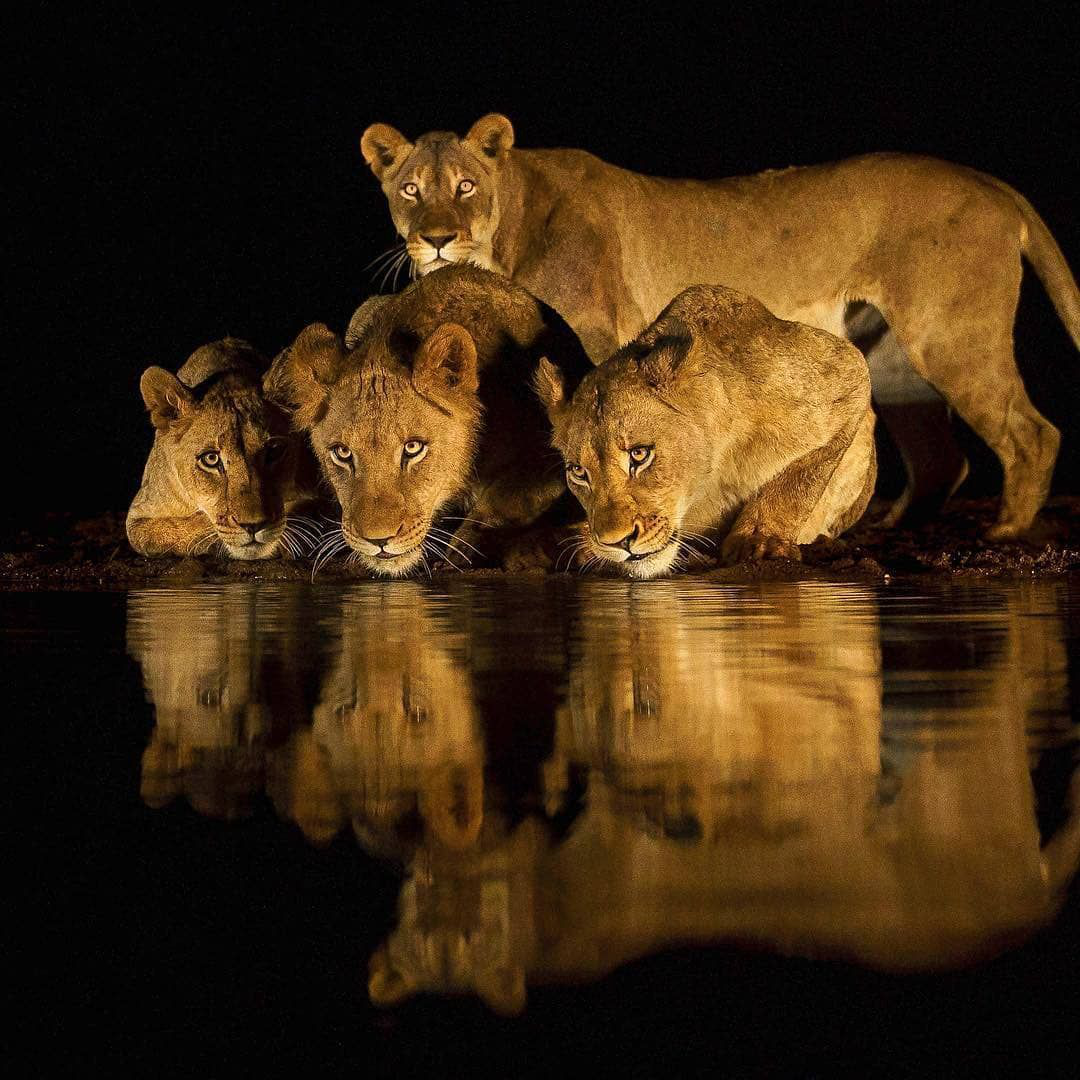

In [3]:
# Original image
im

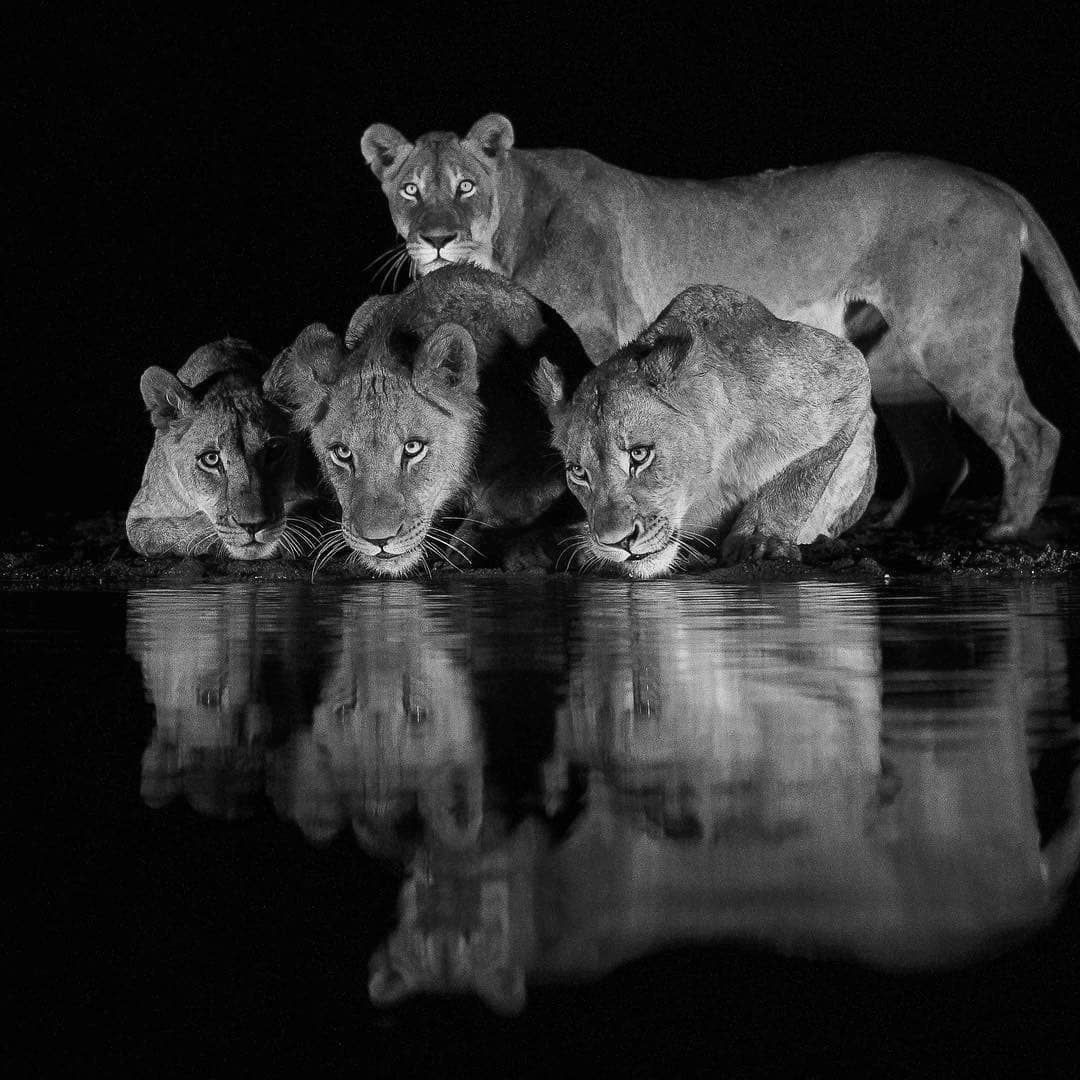

In [4]:
# Converting into gray scale image
imgGray = im.convert('L')
# Displaying the gray scale image
imgGray

In [5]:
def prep_image(random_image):  
  #imgGray = random_image.convert('L')  
  img_yuv = random_image.convert('YCbCr')
  imgGray, cb, cr = img_yuv.split()
  imgArray = np.array(imgGray)
  width, height = random_image.size
  return imgArray, width, height

In [6]:
def uniformPartition(imgArray, width, height, s):
  n = height   # height of the array = width of the image
  m = width    # width of the array = height of the image
  num_of_blocks = (n // s) * (m //s)

  q = 1
  x_array = []
  y_array = []
  X = []
  Y = []

  r = [np.zeros((s, s)) for i in range(num_of_blocks)]
  R = np.concatenate([arr[np.newaxis] for arr in r])
  
  for i in range(1, n//s + 1): 
    for j in range(1, m//s + 1):
      i_i = (i - 1) * s + 1
      x = 0
      while x < s and i_i <= i*s:
        i_j = (j - 1) * s + 1
        y = 0
        while y < s and i_j <= j*s: 
          R[q - 1][x][y] = imgArray[i_i - 1][i_j - 1]    #  [(i - 1) * s + 1 -> i*s], [(j - 1) * s + 1 -> j*s]
          x_array.append(i_i)   # storing row number 
          y_array.append(i_j)   # storing column number
          y += 1
          i_j += 1
        i_i += 1
        x += 1
      q += 1
      X.append(x_array)  # storing the row numbers of the 'n'th image block
      Y.append(y_array) # storing the column numbers of the 'n'th image block
      x_array = []
      y_array = []
      
  return R, num_of_blocks, X, Y

In [7]:
imgArray, width, height = prep_image(imgGray)
G, num_of_blocks, X_blocks, Y_blocks = uniformPartition(imgArray, width, height, 16)

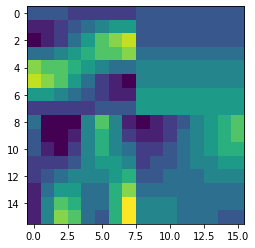

In [8]:
# Displaying a sample 16x16 block
data = G[100]
plt.imshow(data, interpolation='nearest')
plt.show()

In [9]:
def least_square_method(G, Z):
  # Method least squares
  first_term = np.dot(G.T, G)
  if np.linalg.det(first_term) != 0:    # If inverse of matrix doesn't exist we randomly initialise a matrix of the same size
    second_term = np.linalg.inv(first_term)
  else:
    second_term = np.random.randint(3, size=(3,3))
  third_term = np.dot(second_term, G.T)
  A = np.dot(third_term, Z)

  Z_pred = np.dot(G, A.T)
  return Z_pred

In [10]:
def partitionClassification(img, x_samples, y_samples, epsilon):
  # number of pixels
  k = len(x_samples)
  
  # List containing the row numbers of all the pixels
  X = np.asarray(x_samples)
  # List containing the column numbers of all the pixels
  Y = np.asarray(y_samples)
  # A set of gray values of the pixels
  Z = np.asarray(img.flatten())
  
  
  ones = np.asarray([1 for i in range(256)])
  G = np.array([X])
  G = np.vstack([X, Y, ones]).T

  # Obtaining the predicted Z values using LSM
  Z_pred = least_square_method(G, Z)
  # Computing the error
  e = 0
  error = 0
  for i in range(len(Z)):
    error += (Z_pred[i] - Z[i]) ** 2
  e = math.sqrt(error) / k

  if e < epsilon:
    L = 0
    return L, img
  else:
    L = 1
    G_sub, num_of_blocks_sub, X_blocks_sub, Y_blocks_sub = uniformPartition(img, img.shape[0], img.shape[1], 8)
    return L, G_sub

In [11]:
def itanrp_algorithm(img, epsilon): 
  # Intergarting all the functions
  imgArray, width, height = prep_image(img)
  G, num_of_blocks, X_blocks, Y_blocks = uniformPartition(imgArray, width, height, 16)

  L = []
  blocks = []
  print("Block Classification information: ")
  for i in range(num_of_blocks):
    bit_stream, block = partitionClassification(G[i], X_blocks[i], Y_blocks[i], epsilon)
    L.append(bit_stream)
    blocks.append(block)
  print(L)
  return L, blocks

In [12]:
# Lion image
lion_bcl, lion_blocks = itanrp_algorithm(im, 0.6)

Block Classification information: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## Main (with other random images)

Given image: 


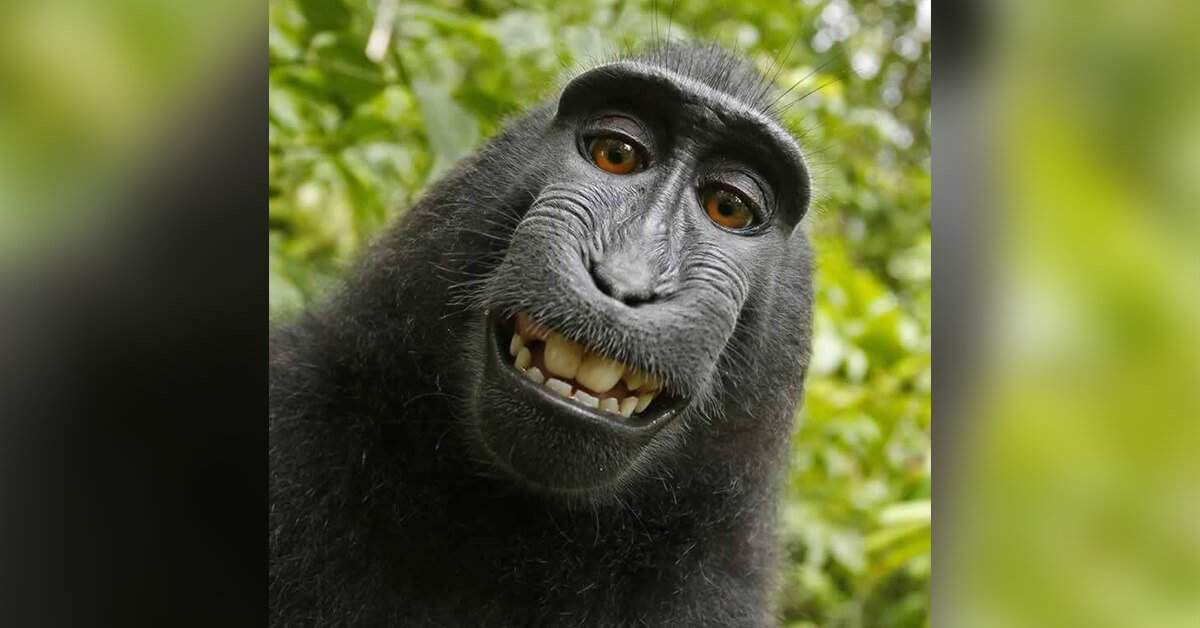

Grayscale image:


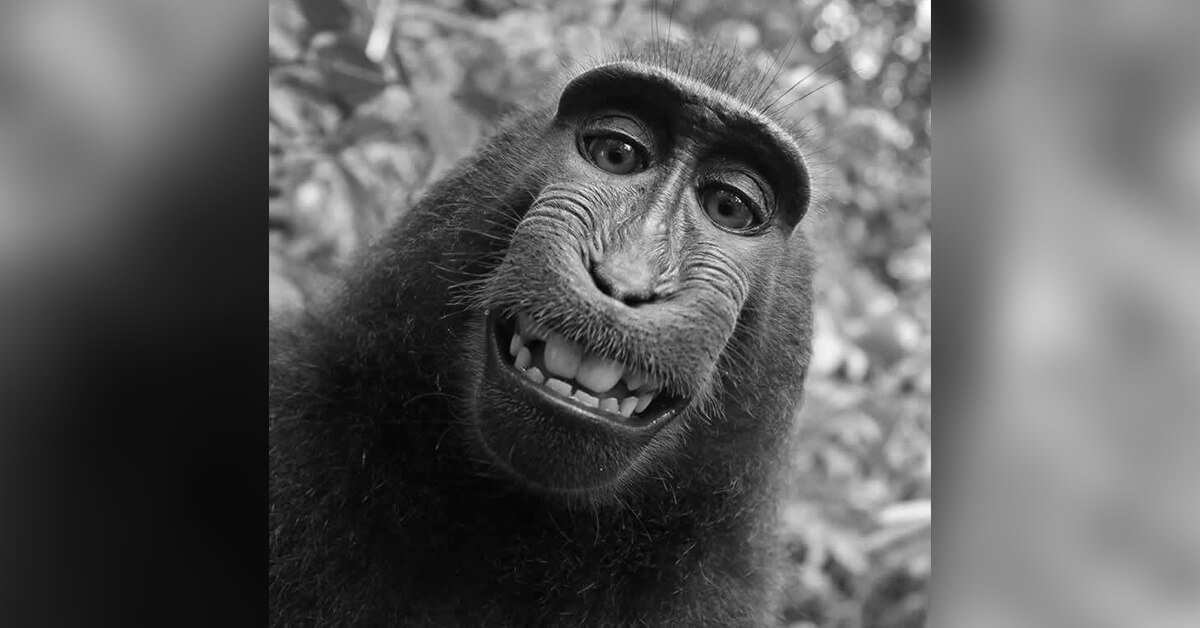

In [14]:
serious_images = Image.open("/content/serious.jpg")
print("Given image: ")
display(serious_images)
print("Grayscale image:")
display(serious_images.convert('L'))

In [15]:
epsilon_value = float(input("Enter value of epsilon: "))

Enter value of epsilon: 0.3


In [16]:
serious_images.size

(1200, 628)

In [17]:
# Image (not equal dimensions)
ser_bcl, ser_blocks = itanrp_algorithm(serious_images, epsilon_value)

Block Classification information: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1

------------------------------------------------------------------------------------------